In [202]:
!pip install folium
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame
import matplotlib.pyplot as plt
import seaborn as sns


# Import Data

In [203]:
# Load my dataset 
data1 = pd.read_csv('1raw-data-2020-2029.csv')
data2 = pd.read_csv('2raw-data-2020-2029.csv')  # Update this path to where your file is located
data = pd.concat([data1, data2], axis=0, ignore_index=True)
print(data.head()) 


      _id  count_id count_date  location_id  \
0   99999     45921  5/19/2022         4588   
1  100000     45921  5/19/2022         4588   
2  100001     45921  5/19/2022         4588   
3  100002     45921  5/19/2022         4588   
4  100003     45921  5/19/2022         4588   

                                            location        lng        lat  \
0  BATHURST ST AT CARSCADDEN DR & ELLERSLIE AVE (... -79.440934  43.765465   
1  BATHURST ST AT CARSCADDEN DR & ELLERSLIE AVE (... -79.440934  43.765465   
2  BATHURST ST AT CARSCADDEN DR & ELLERSLIE AVE (... -79.440934  43.765465   
3  BATHURST ST AT CARSCADDEN DR & ELLERSLIE AVE (... -79.440934  43.765465   
4  BATHURST ST AT CARSCADDEN DR & ELLERSLIE AVE (... -79.440934  43.765465   

   centreline_type  centreline_id     px  ... ex_peds wx_peds  nx_bike  \
0                2       13448217  979.0  ...       1       9        5   
1                2       13448217  979.0  ...       4       6        0   
2                2       1

# Heatmap

In [204]:
# Prepare the data for the heatmap: each row as [latitude, longitude, total traffic]
# Assuming dataset contains traffic-related columns 
traffic_columns = [col for col in data.columns if '_cars_' in col or '_truck_' in col or '_bus_' in col or '_peds' in col or '_bike' in col or '_other' in col]
data['total_traffic'] = data[traffic_columns].sum(axis=1)

# Drop rows with missing location data (lat, lng)
data = data.dropna(subset=['lat', 'lng'])

# Create a list of lat, lng, and total_traffic values for the heatmap
heatmap_data = data[['lat', 'lng', 'total_traffic']].values.tolist()

# Create the map centered around Toronto (adjust coordinates if needed)
toronto_map = folium.Map(location=[43.7, -79.4], zoom_start=12)

# Add the heatmap layer
HeatMap(heatmap_data, radius=10, blur=15, max_zoom=1).add_to(toronto_map)

# Save the map to an HTML file
map_path = 'toronto_traffic_heatmap.html'
toronto_map.save(map_path)

# Display the map directly in the notebook using IFrame
IFrame(map_path, width=800, height=600)

# Distribution Plot

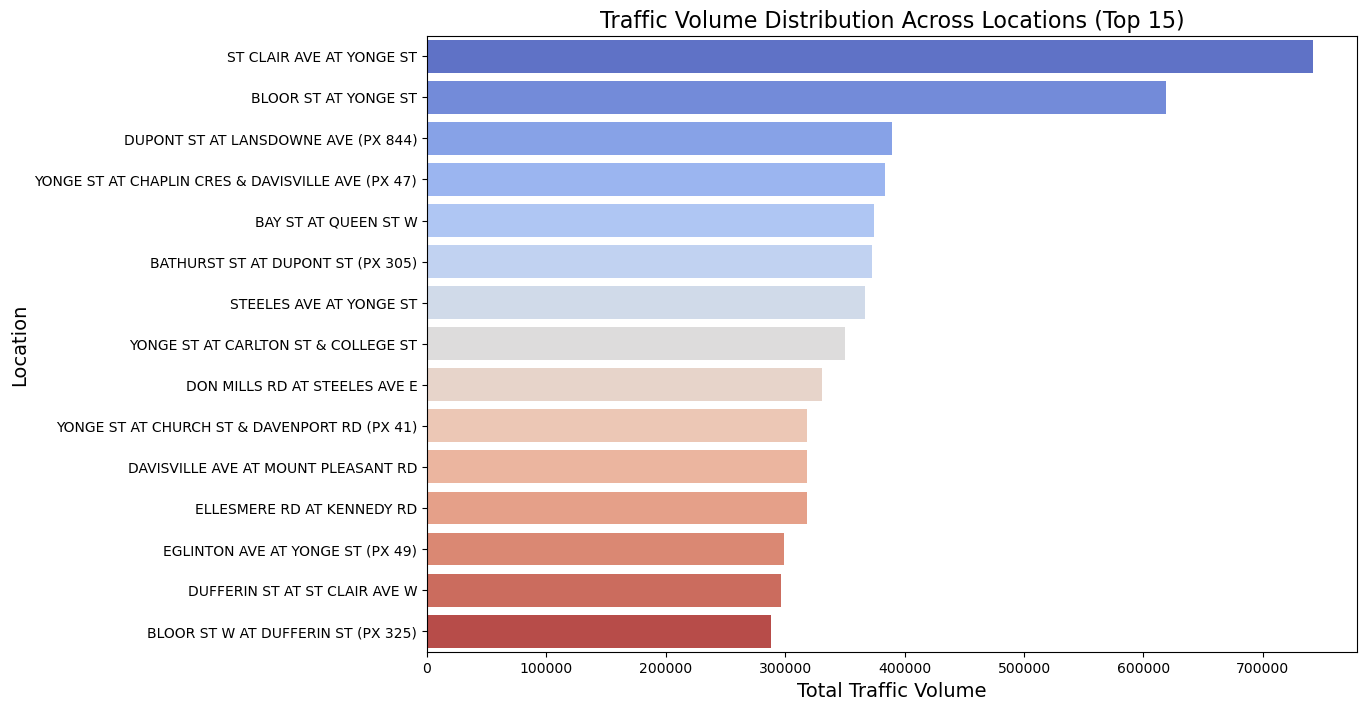

In [205]:
# Group by location to calculate total traffic per location
location_traffic = data.groupby('location')['total_traffic'].sum().sort_values(ascending=False)

# Plot the distribution of traffic across locations
plt.figure(figsize=(12, 8))
sns.barplot(y=location_traffic.index[:15], x=location_traffic.values[:15], palette="coolwarm")
plt.title("Traffic Volume Distribution Across Locations (Top 15)", fontsize=16)
plt.xlabel("Total Traffic Volume", fontsize=14)
plt.ylabel("Location", fontsize=14)
plt.show()

In [206]:
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads  # For parsing WKT (Well-Known Text) geometry
import folium
from folium.plugins import HeatMap

# Load the dataset (replace with the actual file path)
file_path = "PollinateTO_cleaned.csv"
pollinateto_data = pd.read_csv(file_path)

# Check if the geometry column exists
if 'geometry' in pollinateto_data.columns:
    # Parse the geometry column from WKT to Shapely geometry objects
    pollinateto_data['geometry'] = pollinateto_data['geometry'].apply(loads)
else:
    raise ValueError("The dataset must contain a 'geometry' column.")

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(pollinateto_data, geometry='geometry')

# Ensure all geometries are MultiPoint and extract the first point
if all(gdf.geometry.geom_type == 'MultiPoint'):
    gdf['latitude'] = gdf.geometry.apply(lambda geom: geom.geoms[0].y)
    gdf['longitude'] = gdf.geometry.apply(lambda geom: geom.geoms[0].x)
else:
    raise ValueError("All geometries in the dataset must be of type MultiPoint.")

# Prepare data for the heatmap (list of [latitude, longitude])
heat_data = gdf[['latitude', 'longitude']].dropna().values.tolist()

# Create a base map centered on Toronto
m = folium.Map(location=[43.7, -79.4], zoom_start=11)

# Add the heatmap layer
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file
m.save("PollinateTO_heatmap.html")
print("Heatmap saved as 'PollinateTO_heatmap.html'")


Heatmap saved as 'PollinateTO_heatmap.html'
